# Train model

In [1]:
batch_size=128
pickle_file='test_dataset_cluster_labeled.pickle'
limit_seq_len=2000

In [2]:
from dataset import DwgDataset
dwg_dataset = DwgDataset(pickle_file=pickle_file, batch_size=batch_size, limit_seq_len=limit_seq_len)

In [3]:
lr=0.001
epochs=500
train_verbose=True

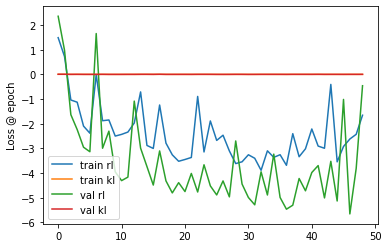

  [  49-   0 @   0.9 sec] RLoss: -0.35735 KL Loss: 0.0031
  [  49-   1 @   1.7 sec] RLoss: -0.03652 KL Loss: 0.0031
  [  49-   2 @   2.5 sec] RLoss: -1.92660 KL Loss: 0.0029
  [  49-   3 @   3.3 sec] RLoss: -4.63383 KL Loss: 0.0028
  [  49-   4 @   4.1 sec] RLoss: -4.72150 KL Loss: 0.0028
  [  49-   5 @   4.9 sec] RLoss: -2.39275 KL Loss: 0.0027
  [  49-   6 @   5.7 sec] RLoss: -2.61252 KL Loss: 0.0026
  [  49-   7 @   6.5 sec] RLoss: -3.99144 KL Loss: 0.0024
  [  49-   8 @   7.3 sec] RLoss: -5.96492 KL Loss: 0.0023
  [  49-   9 @   8.1 sec] RLoss: -3.69887 KL Loss: 0.0022
  [  49-  10 @   8.9 sec] RLoss: -2.36013 KL Loss: 0.0021
  [  49-  11 @   9.7 sec] RLoss: -1.02459 KL Loss: 0.0020
  [  49-  12 @  10.5 sec] RLoss: -2.33968 KL Loss: 0.0019
  [  49-  13 @  11.3 sec] RLoss: -5.23552 KL Loss: 0.0019
  [  49-  14 @  12.1 sec] RLoss: -4.13716 KL Loss: 0.0020
  [  49-  15 @  12.9 sec] RLoss: -3.05032 KL Loss: 0.0020
  [  49-  16 @  13.7 sec] RLoss: -2.23072 KL Loss: 0.0021
  [  49-  17 @

In [4]:
from sketch_rnn import Trainer
from IPython.display import clear_output
from plot_graphics import plot_history

trainer = Trainer(
    dwg_dataset, 
    lr=lr, 
    train_verbose=train_verbose)

train_kl_losses = []
train_rl_losses = []
val_kl_losses  = []
val_rl_losses  = []

for epoch in range(epochs):
    clear_output(wait=True)
    
    plot_history(train_rl_losses, train_kl_losses, val_rl_losses, val_kl_losses)
    test_rl, test_kl, val_rl, val_kl = trainer.train_epoch(epoch)
    
    train_kl_losses.append(test_kl)
    train_rl_losses.append(test_rl)
    val_kl_losses.append(val_kl)
    val_rl_losses.append(val_rl)

# Calculate test accuracy
test_kl, test_rl = trainer.CalculateLoaderAccuracy(trainer.test_loader)
print('Test losses rl:{:1.4f} kl:{:1.4f}'.format(test_rl, test_kl))    